In [68]:
import re
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_openml
mpl.rcParams['figure.figsize'] = [16,9]
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.duplicated().sum()

3

In [4]:
df[df.duplicated()==True]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [9]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df['species'] = pd.factorize(df['species'])[0]

In [13]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


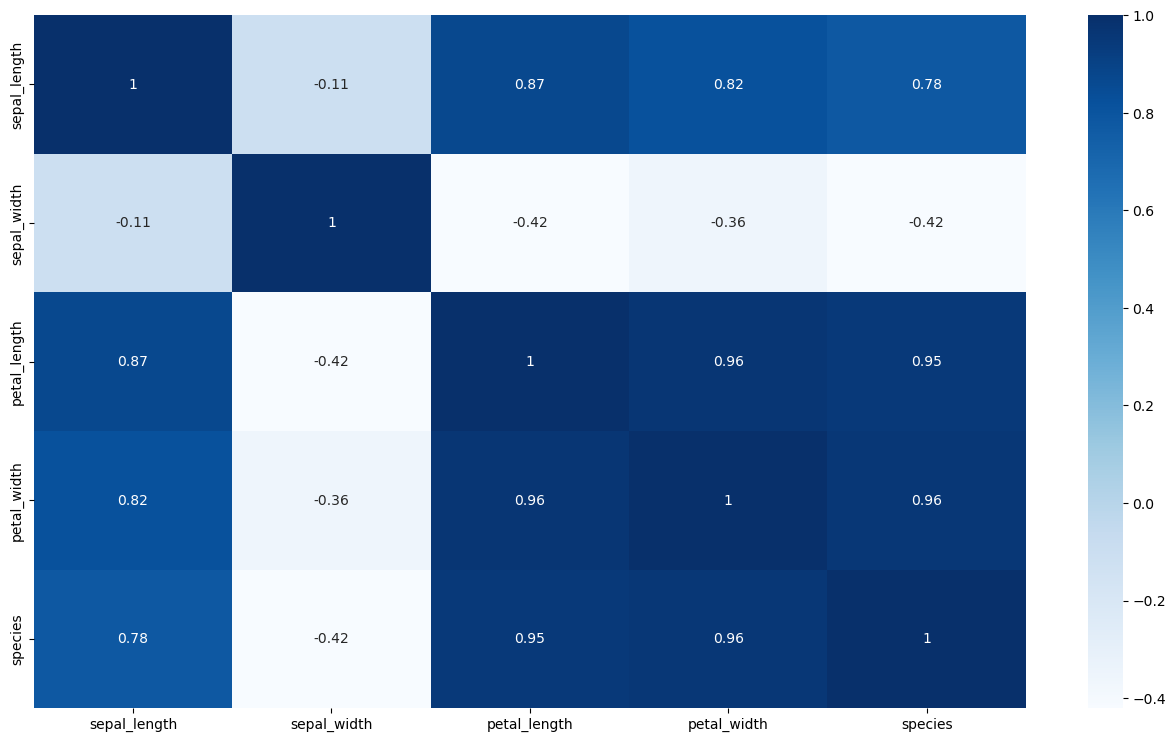

In [122]:
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.show()

In [17]:
min_max_scaler = MinMaxScaler()
df_scaler = min_max_scaler.fit_transform(df)
df_scaler=pd.DataFrame(df_scaler, columns=df.columns)

In [19]:
df_scaler

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


In [21]:
X = df.drop('species', axis=1)
y = df['species']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()

In [25]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [28]:
scaled_X_train

array([[0.08823529, 0.66666667, 0.        , 0.04166667],
       [0.41176471, 1.        , 0.0877193 , 0.125     ],
       [0.70588235, 0.45833333, 0.59649123, 0.54166667],
       [0.14705882, 0.58333333, 0.10526316, 0.04166667],
       [0.02941176, 0.5       , 0.05263158, 0.04166667],
       [0.58823529, 0.20833333, 0.70175439, 0.75      ],
       [0.61764706, 0.5       , 0.61403509, 0.58333333],
       [0.26470588, 0.625     , 0.0877193 , 0.04166667],
       [0.20588235, 0.66666667, 0.07017544, 0.04166667],
       [0.26470588, 0.875     , 0.0877193 , 0.        ],
       [0.44117647, 0.29166667, 0.71929825, 0.75      ],
       [0.5       , 0.58333333, 0.61403509, 0.625     ],
       [0.70588235, 0.45833333, 0.64912281, 0.58333333],
       [0.32352941, 0.79166667, 0.05263158, 0.125     ],
       [0.32352941, 0.70833333, 0.0877193 , 0.04166667],
       [0.35294118, 0.16666667, 0.47368421, 0.375     ],
       [0.58823529, 0.33333333, 0.71929825, 0.58333333],
       [0.61764706, 0.45833333,

In [30]:
rand_for = RandomForestClassifier()
rand_for.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [74]:
prediction1 = rand_for.predict(scaled_X_test)

In [76]:
accuracy_score(prediction1, y_test)

0.9666666666666667

In [78]:
r2_score(prediction1, y_test)

0.95

In [80]:
mean_absolute_error(prediction1, y_test)

0.03333333333333333

In [82]:
mean_squared_error(prediction1, y_test)

0.03333333333333333

In [43]:
knn = KNeighborsClassifier()
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [45]:
prediction2 = knn.predict(scaled_X_test)

In [47]:
accuracy_score(prediction2, y_test)

1.0

In [49]:
r2_score(prediction2, y_test)

1.0

In [51]:
mean_absolute_error(prediction2, y_test)

0.0

In [53]:
mean_squared_error(prediction2, y_test)

0.0

In [56]:
log_reg = LogisticRegression()
log_reg.fit(scaled_X_train,y_train)

LogisticRegression()

In [58]:
prediction3 = knn.predict(scaled_X_test)

In [60]:
accuracy_score(prediction3, y_test)

1.0

In [62]:
r2_score(prediction3, y_test)

1.0

In [64]:
mean_absolute_error(prediction3, y_test)

0.0

In [66]:
mean_squared_error(prediction3, y_test)

0.0

In [95]:
pd.DataFrame({'y_test':y_test, 'prediction':prediction1})

,y_test,prediction
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


In [93]:
pd.DataFrame({'y_test':y_test, 'prediction':prediction2})

,y_test,prediction
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


In [91]:
pd.DataFrame({'y_test':y_test, 'prediction':prediction3})

,y_test,prediction
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


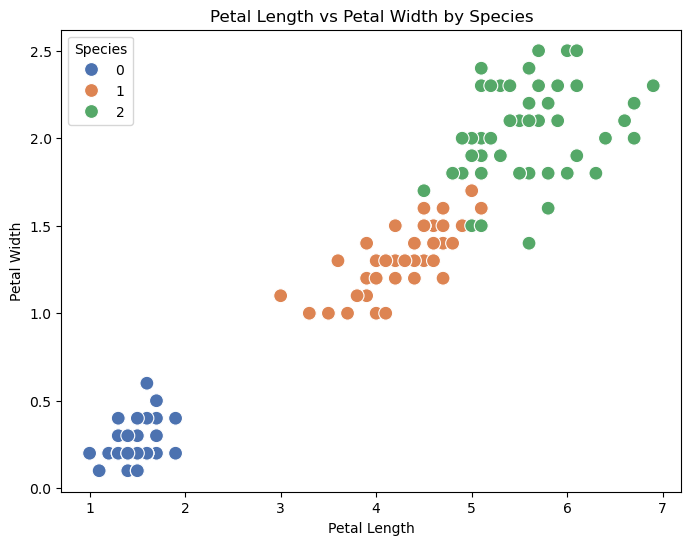

In [103]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['petal_length'], y=df['petal_width'], hue=df['species'], palette='deep', s=100)
plt.title('Petal Length vs Petal Width by Species')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(title='Species')
plt.show()

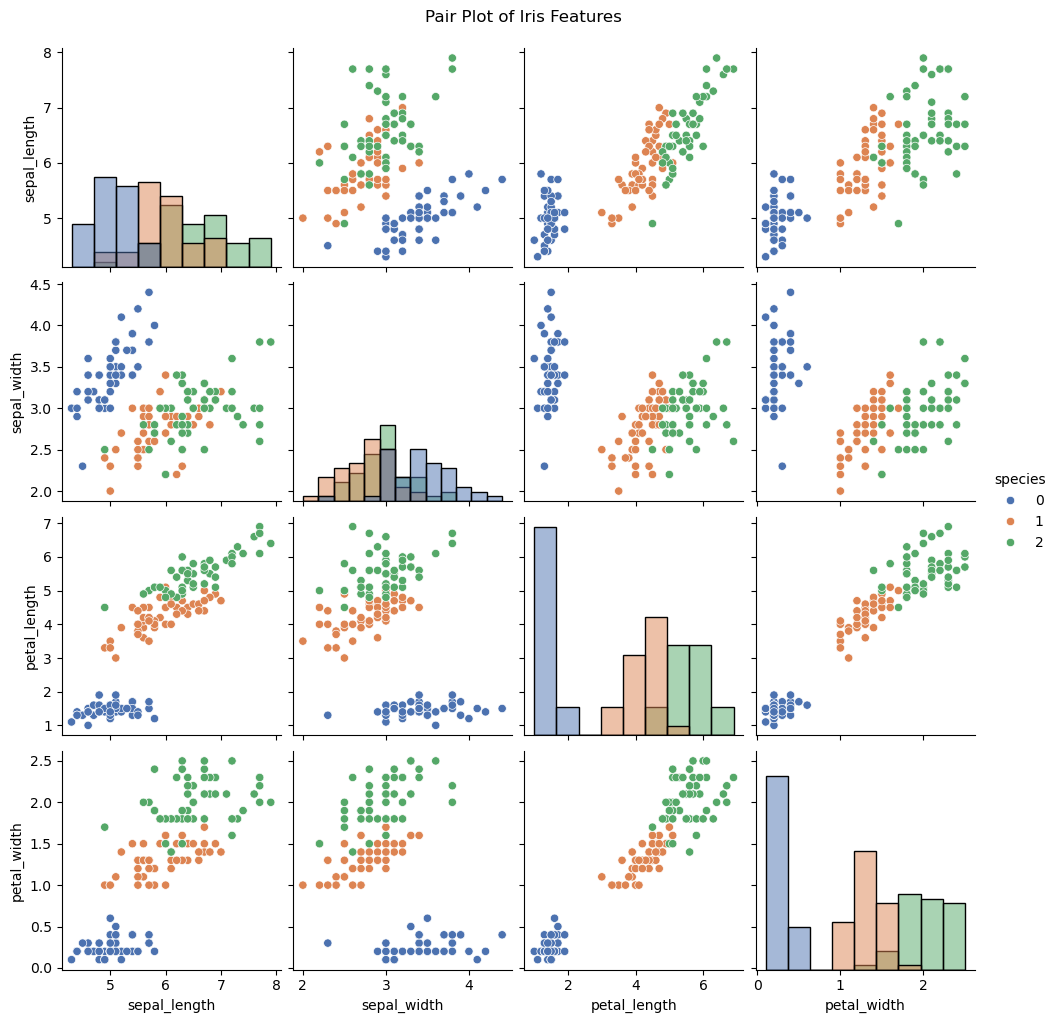

In [121]:
sns.pairplot(df, hue='species', palette='deep', diag_kind='hist')
plt.suptitle('Pair Plot of Iris Features',y=1.02)
plt.show()

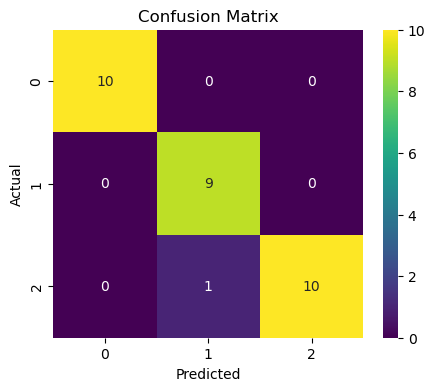

In [129]:
cm = confusion_matrix(y_test, prediction1)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

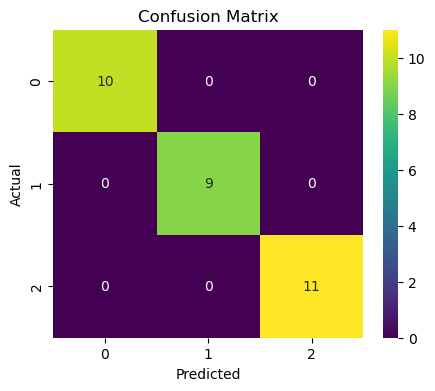

In [131]:
cm = confusion_matrix(y_test, prediction2)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

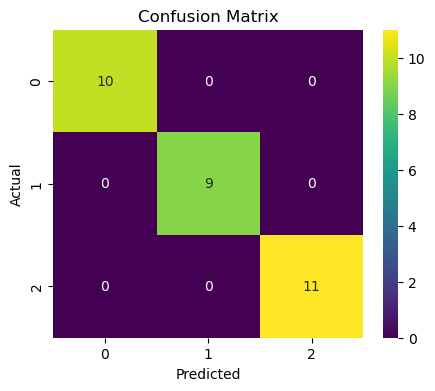

In [135]:
cm = confusion_matrix(y_test, prediction3)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()